# Coding Homework #4

**Instructions**

1. Make a *Markdown Cell* that contains the following information:
- Your name (small header)
- The name of this class (italicized)
- The date (bolded)

2. Create a *Code Cell* that imports relevant modules - specifically, <code>pandas as pd</code>, <code>matplotlib.pyplot as plt</code>, and <code>scipy.stats as stats</code>.

3. For this assignment, you'll be using the <code>patch_seq_expanded.csv</code> file located in our class GitHub repo. Create a *Code Cell* that loads this file in as a <code>Pandas dataFrame</code> called <code>patch_seq</code>. 

4. In a new *Code Cell*, run the following line of code to get rid of empty values:

<code>patch_seq['ISI'] = patch_seq['ISI'].fillna(0)</code>

5. In a new *Code Cell*, using the <code>df.plot</code> method from the <code>pandas</code> module, make a bar graph that displays the value counts (how many observations) from the "Marker" column of your <code>patch_seq</code> variable. Label your x and y-axes.

6. In a new *Code Cell*, repeat step 4, but make a pie chart instead of a bar graph.

7. In a new *Code Cell*, use a <code>for</code> loop to make a scatter plot of the "ISI" (on the x-axis) and "Fast_Trough" (on the y-axis) values in your <code>patch_seq</code> dataframe. Your loop should make data points from "Sst" neurons <font color = 'red'>red</font>, and data points from "Pvalb" neurons <font color = 'blue'>blue</font>.

8. In a new *Code Cell*, create a <code>function</code> called <code>patchScatter()</code> that will output the scatter plot created in step 6 when you call it. Don't forget to tell it to show your scatter plot!

9. In a new *Code Cell*, return the mean, standard deviation, and range of the "Fast_Trough" column for "Sst" neurons and "Pvalb" neurons. You can do this with the <code>pandas</code> method <code>describe</code>, like so:

<code>patch_seq.groupby('Marker')['Fast_Trough'].describe()</code>

10. In a new *Markdown Cell*, describe the difference in means between "Sst" neurons and "Pvalb" neurons. Which group has a more negative undershoot following an action potential? 

11. In a new *Code Cell*, return the skewness of the "Fast_Trough" column for "Sst" neurons and "Pvalb" neurons. You can do this with the <code>pandas</code> method <code>skew</code> (follow the syntax in step 8 to apply this method to <code>patch_seq</code>).

12. In a new *Markdown Cell*, interpret the results of your skewness test. Generally, values >0.5, or <-0.5, indicate a skewed distribution, while values between -0.5 and 0.5 indicate a normal distribution.

13. In a new *Code Cell*, repeat step 10 for the "ISI" column of <code>patch_seq</code>. 

14. In a new *Markdown Cell*, repeat step 11 for the "ISI" column of <code>patch_seq</code>. 

15. Finally, in a new *Code Cell*, let's perform a t-test to see if our "Fast_Trough" and "ISI" values differ between "Sst" and "Pvalb" neurons. To do this for our "Fast_Trough" values, we should first isolate each group and make each of them into a separate variable. An example of how to do this for "Sst" neurons is below:

<code>sst_neurons = patch_seq[patch_seq['Marker']=='Sst']</code>

Use the same code to create another variable called <code>pvalb_neurons</code>. Once you've made your two variables, perform an independent-samples t-test to compare "Fast_Trough" values between the two groups:

<code>stats.ttest_ind(sst_neurons['Fast_Trough'], pvalb_neurons['Fast_Trough'])</code>.

16. In a *Markdown Cell*, describe the results of your t-test. Does the undershoot voltage significantly differ betwen the two groups?

17. In a new *Code Cell*, repeat step 14 for "ISI". You won't need to create new <code>sst_neurons</code> and <code>pvalb_neurons</code> variables - you'll just need to run a new t-test. 

18. In a new *Markdown Cell*, repeat step 15 for the results of your new t-test.

19. Make sure to put a <code>#</code> in each *Code Cell* to describe what it does.

20. Save a copy of this notebook to your GitHub repo with the title <code>coding_homework_4.ipynb</code>.




##Ian Wright
*NEUR 265*
**3/24/2023**


In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

#Importing python packages

In [86]:
url = 'https://raw.githubusercontent.com/hallockh/neur_265/main/patch_seq_expanded.csv'



patch_seq = pd.read_csv(url)
print(patch_seq)

#Uploading the url and creating a dataframe patch_seq. Printing patch_seq to see it 

           ISI  Fast_Trough Marker
0    77.337143   -49.899998    Sst
1    17.177895   -44.462498    Sst
2    48.294737   -47.350002    Sst
3     8.980000   -45.656254    Sst
4    30.315385   -50.737499    Sst
..         ...          ...    ...
360  11.052333   -54.743752  Pvalb
361   8.860360   -64.875008  Pvalb
362   9.192897   -51.312504  Pvalb
363  10.544731   -52.281254  Pvalb
364  16.396364   -61.437504  Pvalb

[365 rows x 3 columns]


In [87]:
patch_seq['ISI'] = patch_seq['ISI'].fillna(0)

#Mandatory step to get rid of empty values

Text(0.5, 0, 'Marker')

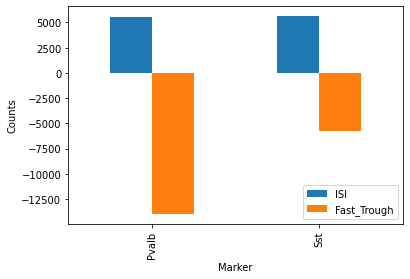

In [97]:
patch_seq.groupby(['Marker']).sum().plot(kind='bar')
plt.ylabel('Counts')
plt.xlabel('Marker')

#Making a bar graph for the counts of each marker for their respective ISI and Fast_Trough counts.

<Axes: ylabel='ISI'>

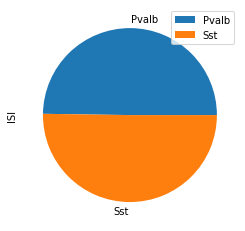

In [100]:
#Pvalb and Sst pie chart for ISI counts. Sst appears to have slightly more than Pvalb, but they are very very close.

patch_seq.groupby(['Marker']).sum().plot(kind='pie', y='ISI')


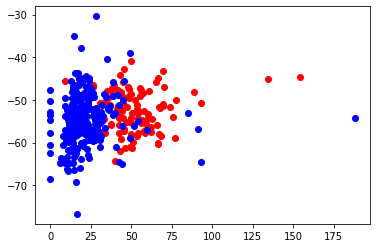

In [7]:
patch_length = len(patch_seq)
for i in range(patch_length):
  if patch_seq.iloc[i,2] == 'Sst':
    plt.scatter(patch_seq.iloc[i,0], patch_seq.iloc[i,1], color = "red")
  else:
    plt.scatter(patch_seq.iloc[i,0], patch_seq.iloc[i,1], color = "blue")

  #Making a for loop that creates a scatter plot that goes through the index and identifies which values are Sst (Red) and Pvalb (Blue) and graphs them with their respective color.

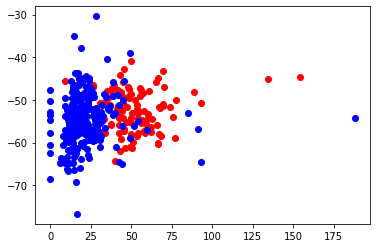

In [8]:
def patchScatter():
  patch_length = len(patch_seq)
  for i in range(patch_length):
    if patch_seq.iloc[i,2] == 'Sst':
      plt.scatter(patch_seq.iloc[i,0], patch_seq.iloc[i,1], color = "red")
    else:
      plt.scatter(patch_seq.iloc[i,0], patch_seq.iloc[i,1], color = "blue")
patchScatter()

#Does the same thing as the code block before, but creates a callable variable. Also calls the variable.

In [20]:
patch_seq.groupby('Marker')['Fast_Trough'].describe()
#Makes a descriptive chart for fast trough based on marker. 

,count,mean,std,min,25%,50%,75%,max
Marker,,,,,,,,
Pvalb,256.0,-54.548074,5.870670,-76.687508,-57.914063,-54.490629,-51.364065,-30.406252
Sst,109.0,-52.514968,4.958103,-64.375008,-55.931252,-52.568752,-48.500000,-40.781254


Pvalb has more undershoot, this is reflected by the more negative mean, meaning that after an action potential it goes more negative.

In [64]:
patch_seq.skew(axis=0,skipna=True,level=None,numeric_only=None)

#Making a t-test that compares ISI and Fast_Trough for skewedness.

<ipython-input-64-4be5e2768676>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  patch_seq.skew(axis=0,skipna=True,level=None,numeric_only=None)


ISI            2.264942
Fast_Trough    0.084627
dtype: float64

ISI is not very skewed because it is greater than .5 but Fast_trough is relatively skewed with less than 0.5

In [67]:
patch_seq.skew(axis=1,skipna=True,level=None,numeric_only=None)

<ipython-input-67-f5c71b1ec039>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  patch_seq.skew(axis=1,skipna=True,level=None,numeric_only=None)


0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
360   NaN
361   NaN
362   NaN
363   NaN
364   NaN
Length: 365, dtype: float64

There was a mistake with this one, in which there are NaN's.

In [74]:
sst_neurons = patch_seq[patch_seq['Marker']=='Sst']
pvalb_neurons = patch_seq[patch_seq['Marker']=='Pvalb']
stats.ttest_ind(sst_neurons['Fast_Trough'], pvalb_neurons['Fast_Trough'])

Ttest_indResult(statistic=3.1660773376899147, pvalue=0.0016757984214133585)

There is a significant difference betweeen Sst and Pvalb neurons in fast trough.

In [75]:
stats.ttest_ind(sst_neurons['ISI'], pvalb_neurons['ISI'])

Ttest_indResult(statistic=15.004913280678535, pvalue=6.160372584319923e-40)

The p-value is very large, indicating that there is no difference between sst neurons and pvalb neurons for ISI.